# PROJETO DE DISCIPLINA - REDES NEURAIS PROFUNDAS

### Aluno: Sonia Mores Podcameni

### 3 - Vamos fazer uma análise:

- Utilize a base Animals-10- originalmente do Kaggle (5000 imagens de 10 animais diferentes), mas disponibilizada em uma versão menor aqui;
- Utilizando um modelo pré-treinado ResNet-50 (presente no Tensorflow/Keras), e realize as extrações de características, fazendo a projeção das imagens no espaço característico (penúltima camada da ResNet-50);
- Realize a clusterização dos vetores obtidos usando o algoritmo K-médias (K=10);
- Mostre exemplos de imagens dos 10 clusters obtidos;
- Os resultados foram satisfatórios? Justifique utilizando seus conhecimentos sobre avaliação de clusters;
- Disponibilize os códigos, bem como o relatório final no Github;
- O projeto deve estar na organização proposta pela TDSP (Microsoft).


#### 3.1 - Importando bibliotecas

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import tensorflow as tf
import tensorflow.keras as K

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


#### 3.2 - Importando imagens e verificando

In [2]:
# Função para carregar imagens e pré-processá-las
def load_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        images.append(img)
    return np.vstack(images)

In [3]:
# Diretório contendo as imagens
base_dir = r'C:\Users\Samsung\OneDrive\CURSOS\REDES NEURAIS PROFUNDAS INFNET\Questão 4\animals10_small'

# Lista todas as pastas dentro do diretório
pastas = [nome for nome in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, nome))]

# Imprime o nome de todas as pastas
for pasta in pastas:
    print(pasta)

butterfly
cat
chicken
cow
dogs
elephant
horse
sheep
spider
squirrel


In [4]:
image_files = os.listdir(base_dir)

In [5]:
paths = []

for img in image_files:
    path2 = os.path.join(base_dir, img)
    for img2 in os.listdir(path2):
        #print(os.path.join(path2, img2))
        path3 = (os.path.join(path2, img2))
        paths.append(path3)

In [14]:
#for elem in paths:
    #print(elem)

In [7]:
images = load_images(paths)
print(images)

[[[[  14.060997     30.221        27.32      ]
   [  15.060997     31.221        28.32      ]
   [  17.060997     33.221        31.32      ]
   ...
   [ -33.939003     12.221001    -14.68      ]
   [ -33.939003     12.221001    -14.68      ]
   [ -34.939003     11.221001    -15.68      ]]

  [[  14.060997     30.221        27.32      ]
   [  16.060997     32.221        29.32      ]
   [  17.060997     33.221        31.32      ]
   ...
   [ -32.939003     13.221001    -13.68      ]
   [ -31.939003     11.221001    -14.68      ]
   [ -34.939003      8.221001    -17.68      ]]

  [[  14.060997     30.221        27.32      ]
   [  15.060997     31.221        28.32      ]
   [  16.060997     32.221        30.32      ]
   ...
   [ -31.939003     11.221001    -14.68      ]
   [ -31.939003     10.221001    -15.68      ]
   [ -32.939003      8.221001    -15.68      ]]

  ...

  [[ -19.939003     47.221        41.32      ]
   [ -20.939003     46.221        40.32      ]
   [ -20.939003     46.221

In [8]:
images.shape

(5000, 224, 224, 3)

In [9]:
# Carregar as imagens e obter as features da penúltima camada da ResNet50
model = ResNet50(weights='imagenet', include_top=False)

In [10]:
features = model.predict(images)
features_flatten = features.reshape(features.shape[0], -1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 851s 5s/step


In [11]:
features_flatten[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [13]:
# Clusterização usando K-means
kmeans = KMeans(n_clusters=10)
kmeans.fit(features_flatten)
cluster_labels = kmeans.labels_

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


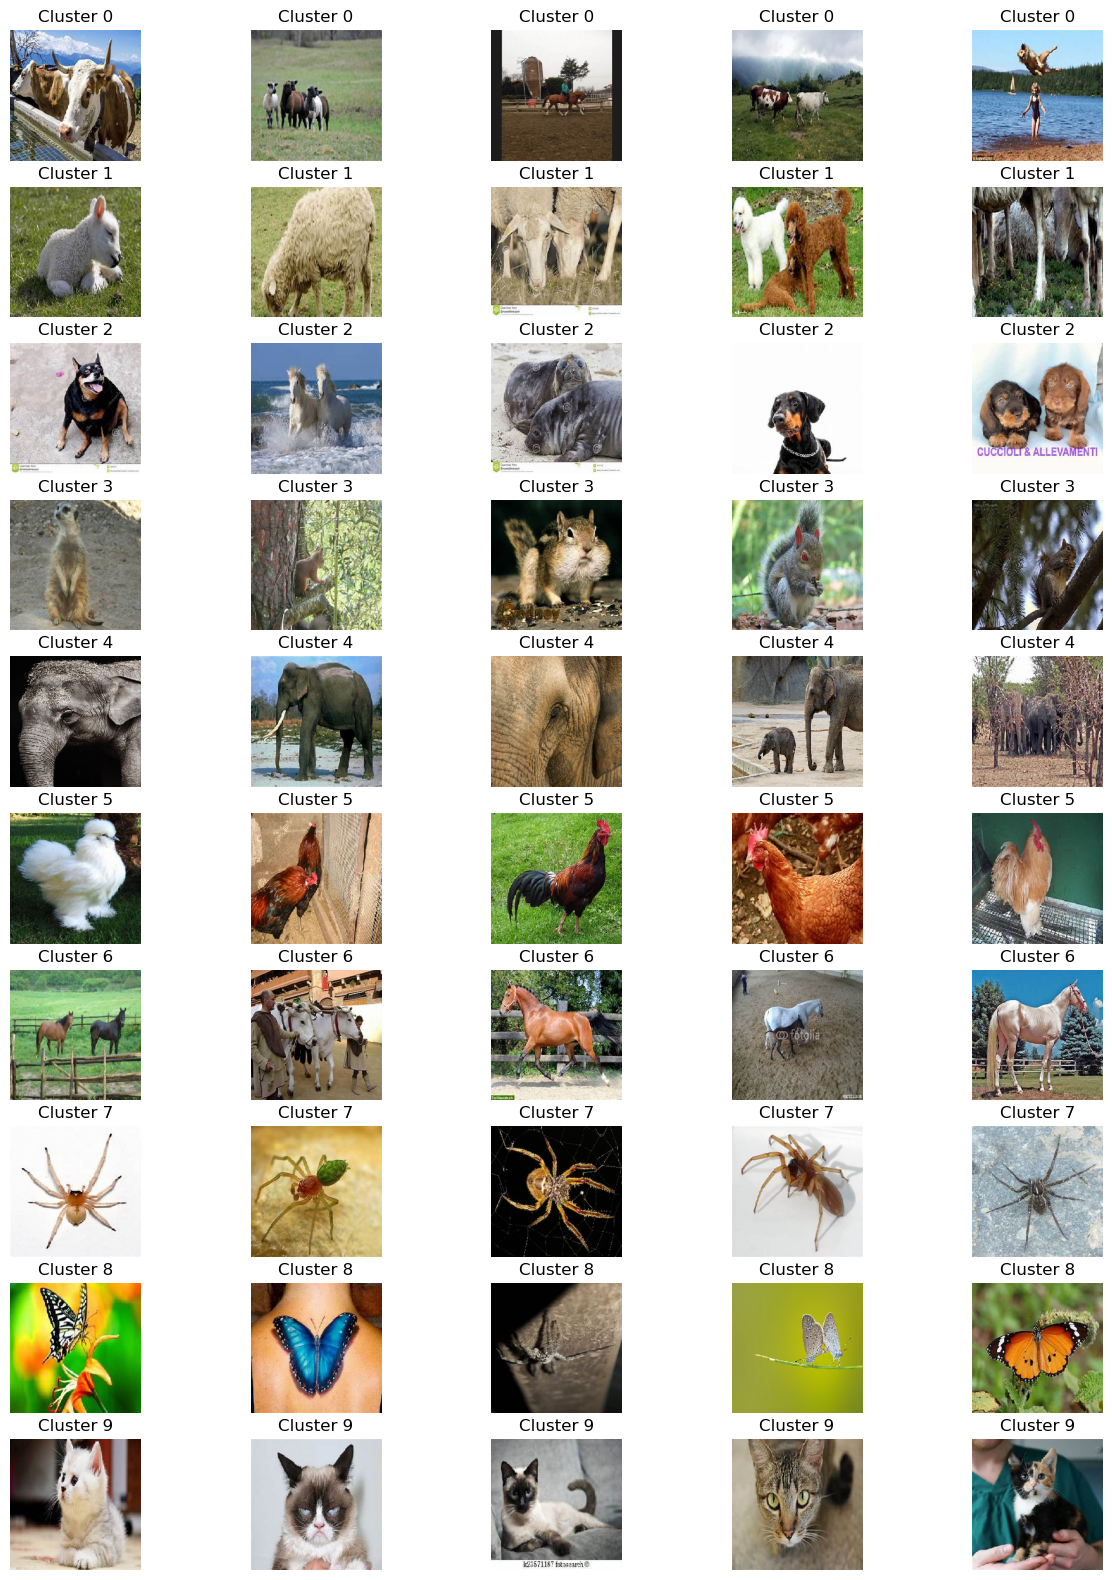

In [15]:
# Exibir exemplos de imagens para cada cluster
num_examples = 5
fig, axs = plt.subplots(10, num_examples, figsize=(15, 20))

for cluster_id in range(10):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_samples = np.random.choice(cluster_indices, num_examples, replace=False)
    for i, sample_idx in enumerate(cluster_samples):
        img = image.load_img(paths[sample_idx], target_size=(224, 224))
        axs[cluster_id, i].imshow(img)
        axs[cluster_id, i].axis('off')
        axs[cluster_id, i].set_title(f'Cluster {cluster_id}')

plt.show()

3.3 - Avaliação do modelo
Avaliando o modelo, vemos que em alguns clusters ele apresenta problema, e adotando um parâmetro de 95% de acerto.